In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [17]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [20]:
#checking for null values in train and test data
train_nan_values = train_data.isna().sum()

test_nan_values = test_data.isna().sum()

print("NaN values in training data:")
print(train_nan_values)

print("\nNaN values in testing data:")
print(test_nan_values)

NaN values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NaN values in testing data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


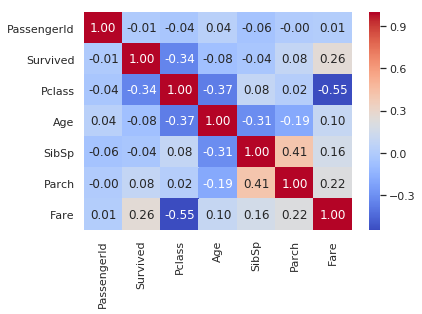

In [21]:
# Visulizing correlation matrix of train data
train_correlation_matrix = train_data.corr()
sns.heatmap(train_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Displaying the plot
plt.show()

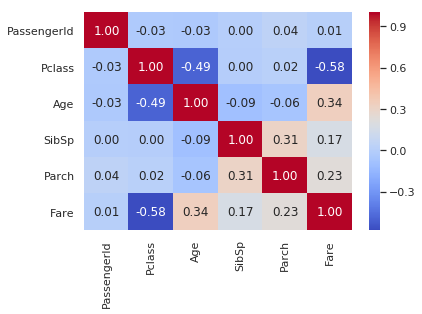

In [22]:
# Visualize the correlation matrix of test data
test_correlation_matrix = test_data.corr()
sns.heatmap(test_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Displaying the plot
plt.show()

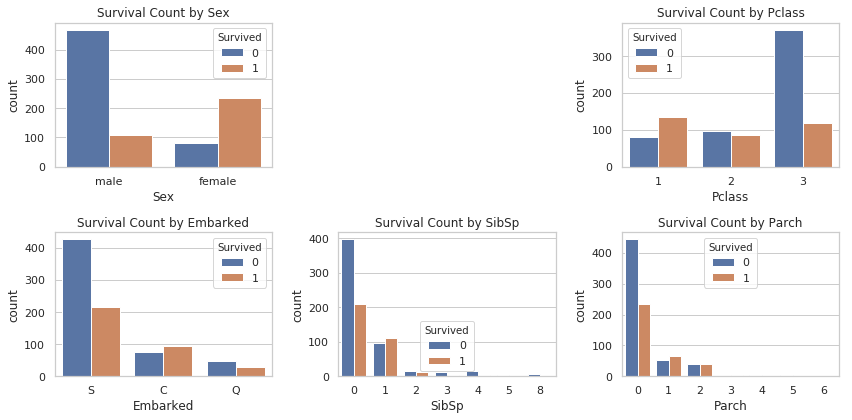

In [23]:
# Set the style for the plots
sns.set(style="whitegrid")

# graph for Sex and Survived
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Sex')

# graph for Pcalss and Survived
plt.subplot(2, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Pclass')

# graph for Embarked and Survived
plt.subplot(2, 3, 4)
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival Count by Embarked')

# graph for SibSp and Survived
plt.subplot(2, 3, 5)
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title('Survival Count by SibSp')

# graph for Parch and Survived
plt.subplot(2, 3, 6)
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title('Survival Count by Parch')

# Show the plots
plt.tight_layout()
plt.show()

In [24]:
# Filling null values of column Age with mean in train data 
train_columns = ['Age']

train_data.loc[:, train_columns] = train_data.loc[:, train_columns].fillna(train_data.loc[:, train_columns].mean(numeric_only=True)).copy()

In [25]:
# Filling null values in columns of Age and Fare with mean
test_columns = ['Age','Fare']

test_data.loc[:, test_columns] = test_data.loc[:, test_columns].fillna(test_data.loc[:, test_columns].mean(numeric_only=True)).copy()

In [26]:
# Defined the age threshold for considering passengers as children
child_age_threshold = 18

# Created 'WomenChildren' feature in test and train data
train_data['WomenChildren'] = ((train_data['Sex'] == 'female') | (train_data['Age'] < child_age_threshold)).astype(int)
test_data['WomenChildren'] = ((test_data['Sex'] == 'female') | (test_data['Age'] < child_age_threshold)).astype(int)

In [27]:
# dropping cabin column as it is having high null values and not significant feature
train_data = train_data.drop('Cabin', axis=1).copy()
test_data = test_data.drop('Cabin', axis=1).copy()

In [28]:
# droping total row Embarked in train and test as there are of least percentage
train_data = train_data.dropna()

In [29]:
# Checking for any null values and total of train and test data 
train_data_count = train_data.shape[0]
print("Total number of rows in the training data after dropping:", train_data_count)

print("Rows with null values in training data after dropping:")
print(train_data.isnull().sum())

test_data_count = test_data.shape[0]

print("Total number of rows in the testing data after dropping:", test_data_count)

print("Rows with null values in testing data after dropping:")
print(test_data.isnull().sum())

Total number of rows in the training data after dropping: 889
Rows with null values in training data after dropping:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
WomenChildren    0
dtype: int64
Total number of rows in the testing data after dropping: 418
Rows with null values in testing data after dropping:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
WomenChildren    0
dtype: int64


In [30]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
